In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df=pd.read_csv("/content/diabetes.csv")

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
x=df[['Glucose','BMI']]

In [ ]:
x

,Glucose,BMI
0,148,33.6
1,85,26.6
2,183,23.3
3,89,28.1
4,137,43.1
...,...,...
763,101,32.9
764,122,36.8
765,121,26.2
766,126,30.1


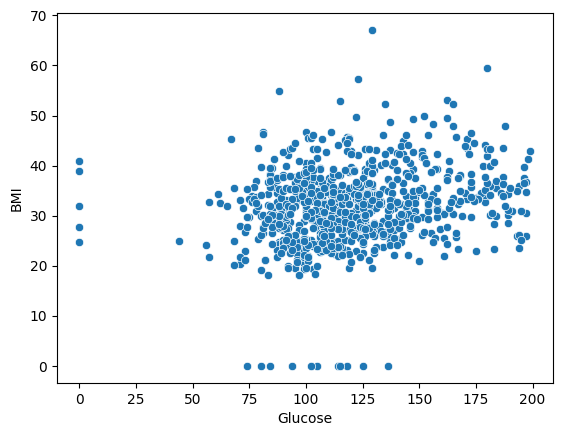

In [ ]:
sns.scatterplot(x='Glucose', y='BMI', data=x);

In [ ]:
Km=KMeans()

In [ ]:
clusterS=Km.fit_predict(x)
clusterS

array([5, 2, 1, 7, 5, 3, 2, 3, 1, 3, 0, 6, 5, 1, 6, 0, 3, 0, 0, 3, 3, 0,
       1, 3, 5, 3, 5, 7, 5, 3, 0, 6, 7, 7, 3, 7, 5, 0, 2, 0, 1, 5, 0, 6,
       6, 1, 5, 2, 0, 7, 7, 7, 7, 1, 5, 2, 1, 0, 5, 0, 7, 5, 4, 5, 0, 7,
       0, 0, 7, 5, 0, 5, 3, 3, 2, 4, 2, 0, 3, 0, 0, 7, 2, 7, 5, 0, 0, 0,
       5, 0, 2, 3, 2, 5, 5, 5, 7, 2, 7, 3, 6, 5, 3, 2, 2, 3, 7, 5, 2, 0,
       6, 6, 2, 2, 6, 5, 3, 2, 7, 7, 6, 0, 0, 5, 0, 2, 3, 3, 3, 0, 1, 3,
       6, 2, 7, 3, 0, 7, 3, 0, 3, 0, 0, 0, 6, 7, 2, 0, 5, 7, 5, 0, 6, 6,
       1, 6, 7, 0, 2, 6, 6, 0, 0, 0, 3, 0, 5, 3, 0, 0, 0, 5, 2, 2, 2, 1,
       2, 3, 5, 3, 7, 3, 4, 2, 5, 1, 1, 3, 0, 5, 0, 3, 6, 5, 2, 6, 0, 0,
       0, 5, 0, 5, 0, 7, 0, 0, 1, 6, 0, 1, 2, 5, 1, 5, 0, 6, 0, 3, 2, 0,
       1, 6, 3, 5, 7, 2, 0, 6, 1, 3, 5, 5, 2, 3, 2, 6, 1, 1, 6, 7, 7, 2,
       5, 3, 5, 1, 3, 6, 3, 0, 0, 3, 7, 2, 7, 0, 0, 0, 1, 6, 1, 5, 7, 5,
       3, 0, 5, 3, 7, 5, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 5, 3, 5, 6, 0, 5,
       6, 3, 7, 0, 2, 0, 3, 3, 6, 6, 5, 3, 0, 0, 6,

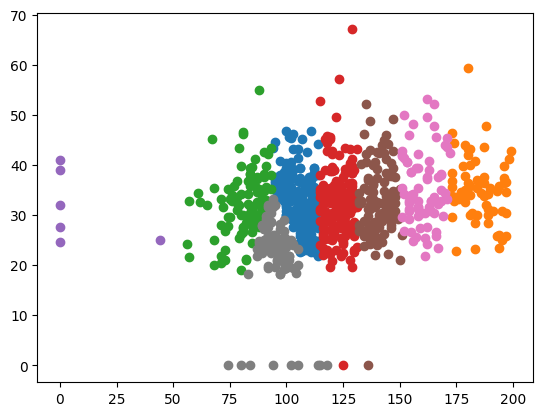

In [ ]:
plt.scatter(x[clusterS==0]['Glucose'],x[clusterS==0]['BMI'])
plt.scatter(x[clusterS==1]['Glucose'],x[clusterS==1]['BMI'])
plt.scatter(x[clusterS==2]['Glucose'],x[clusterS==2]['BMI'])
plt.scatter(x[clusterS==3]['Glucose'],x[clusterS==3]['BMI'])
plt.scatter(x[clusterS==4]['Glucose'],x[clusterS==4]['BMI'])
plt.scatter(x[clusterS==5]['Glucose'],x[clusterS==5]['BMI'])
plt.scatter(x[clusterS==6]['Glucose'],x[clusterS==6]['BMI'])
plt.scatter(x[clusterS==7]['Glucose'],x[clusterS==7]['BMI'])

In [ ]:
silhouette_score(x,Km.labels_)

np.float64(0.3545181344060935)

In [ ]:
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss

[831741.1647265628,
 327187.644186807,
 197500.57049490957,
 149618.3639087464,
 111086.0265357291,
 86863.25339193412,
 75998.73384167861,
 68415.29527763321,
 60397.59593169742]

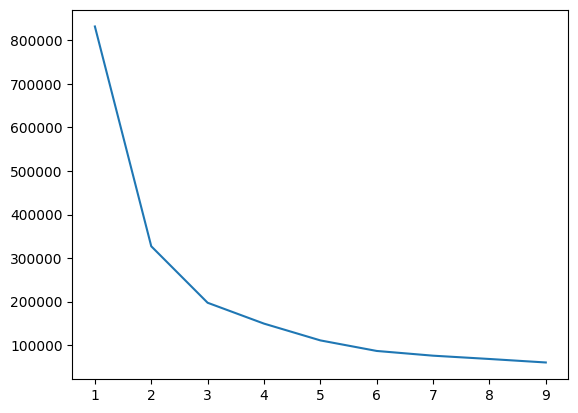

In [ ]:
plt.plot(list(range(1,10)),wcss)

In [ ]:
Km= KMeans(n_clusters=5)

In [ ]:
clusters=Km.fit_predict(x)
clusters

array([3, 2, 1, 2, 3, 0, 2, 0, 1, 0, 0, 1, 3, 1, 1, 0, 0, 0, 0, 0, 3, 2,
       1, 0, 3, 0, 3, 2, 3, 0, 0, 1, 2, 2, 0, 0, 3, 0, 2, 0, 1, 3, 0, 1,
       1, 1, 3, 2, 0, 0, 0, 0, 2, 1, 3, 2, 1, 0, 3, 0, 2, 3, 4, 3, 0, 2,
       0, 0, 2, 3, 0, 3, 3, 3, 2, 4, 2, 2, 3, 0, 0, 2, 2, 0, 3, 0, 0, 0,
       3, 0, 2, 0, 2, 3, 3, 3, 2, 2, 2, 0, 1, 3, 0, 2, 2, 3, 2, 3, 2, 2,
       1, 3, 2, 2, 1, 3, 0, 2, 2, 2, 1, 0, 0, 3, 0, 2, 0, 0, 0, 0, 1, 0,
       1, 2, 2, 0, 0, 2, 3, 0, 3, 0, 0, 0, 3, 0, 2, 0, 3, 2, 3, 0, 3, 3,
       1, 3, 2, 0, 2, 1, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 2, 2, 2, 1,
       2, 3, 3, 3, 2, 0, 4, 2, 3, 1, 1, 3, 0, 3, 0, 0, 1, 3, 2, 1, 0, 0,
       0, 3, 0, 3, 0, 2, 0, 0, 1, 1, 2, 1, 2, 3, 1, 3, 0, 3, 0, 0, 2, 0,
       1, 1, 0, 3, 0, 2, 0, 1, 1, 0, 3, 3, 2, 0, 2, 1, 1, 1, 1, 0, 2, 2,
       3, 0, 3, 1, 0, 1, 0, 0, 0, 3, 2, 2, 2, 0, 0, 0, 1, 3, 1, 3, 2, 3,
       0, 2, 3, 3, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 3, 3, 1, 0, 3,
       3, 0, 2, 0, 2, 0, 3, 3, 1, 3, 3, 3, 0, 0, 1,

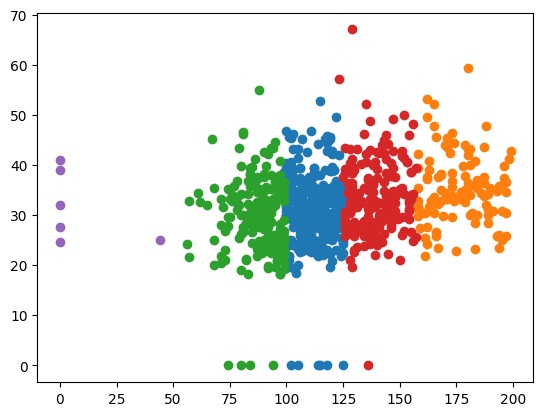

In [ ]:
plt.scatter(x[clusters==0]['Glucose'],x[clusters==0]['BMI'])
plt.scatter(x[clusters==1]['Glucose'],x[clusters==1]['BMI'])
plt.scatter(x[clusters==2]['Glucose'],x[clusters==2]['BMI'])
plt.scatter(x[clusters==3]['Glucose'],x[clusters==3]['BMI'])
plt.scatter(x[clusters==4]['Glucose'],x[clusters==4]['BMI'])
plt.scatter(x[clusters==5]['Glucose'],x[clusters==5]['BMI'])

In [ ]:
print(silhouette_score(x,Km.labels_))

0.41169941780026775


# with new dataset

In [ ]:
import seaborn as sns

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
df=sns.load_dataset("tips")

In [ ]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
x=df[['total_bill','tip']]

<Axes: xlabel='total_bill', ylabel='tip'>

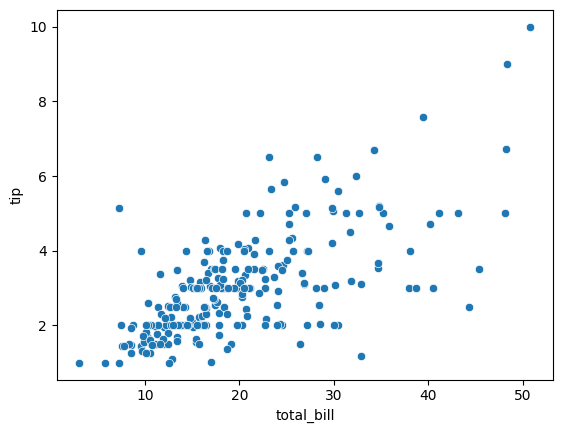

In [ ]:
sns.scatterplot(x=x['total_bill'], y=x['tip'])

In [ ]:
kmeans=KMeans()

In [ ]:
clusters=kmeans.fit_predict(x)

In [ ]:
clusters

array([0, 3, 4, 6, 6, 6, 3, 1, 0, 0, 3, 5, 0, 4, 0, 4, 3, 0, 0, 4, 0, 4,
       0, 5, 4, 0, 7, 7, 4, 4, 3, 4, 0, 4, 0, 6, 0, 0, 4, 1, 0, 0, 7, 3,
       1, 4, 6, 5, 1, 0, 7, 3, 5, 3, 6, 4, 5, 1, 7, 2, 4, 7, 3, 4, 0, 4,
       0, 3, 4, 0, 7, 0, 1, 6, 0, 3, 0, 1, 6, 0, 4, 0, 3, 5, 0, 5, 7, 4,
       6, 4, 1, 6, 3, 0, 6, 2, 1, 7, 4, 7, 7, 0, 2, 6, 4, 0, 4, 6, 4, 7,
       7, 3, 5, 6, 6, 0, 1, 3, 7, 6, 7, 7, 7, 0, 7, 1, 3, 7, 7, 6, 4, 4,
       7, 7, 4, 3, 3, 7, 0, 7, 0, 5, 2, 1, 0, 3, 4, 7, 3, 3, 7, 7, 0, 6,
       4, 1, 2, 6, 7, 0, 4, 7, 0, 7, 0, 6, 4, 5, 3, 3, 2, 0, 3, 5, 0, 5,
       0, 7, 3, 5, 5, 6, 2, 6, 2, 4, 4, 1, 4, 6, 0, 4, 1, 0, 0, 3, 3, 2,
       7, 7, 4, 7, 7, 0, 4, 0, 1, 5, 6, 7, 1, 6, 2, 7, 1, 7, 1, 7, 3, 1,
       7, 7, 3, 0, 7, 0, 3, 4, 7, 6, 6, 0, 7, 3, 0, 3, 7, 5, 5, 1, 1, 6,
       0, 4], dtype=int32)

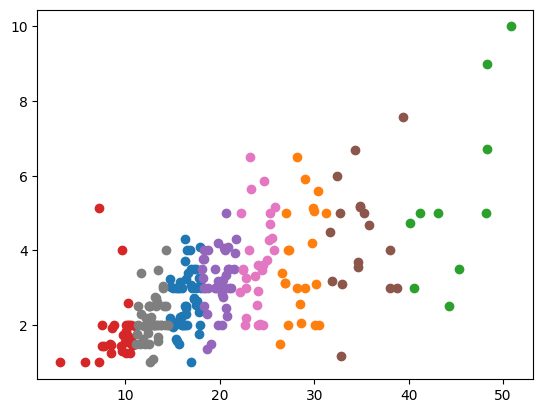

In [ ]:
plt.scatter(x[clusters==0]['total_bill'],x[clusters==0]['tip'])
plt.scatter(x[clusters==1]['total_bill'],x[clusters==1]['tip'])
plt.scatter(x[clusters==2]['total_bill'],x[clusters==2]['tip'])
plt.scatter(x[clusters==3]['total_bill'],x[clusters==3]['tip'])
plt.scatter(x[clusters==4]['total_bill'],x[clusters==4]['tip'])
plt.scatter(x[clusters==5]['total_bill'],x[clusters==5]['tip'])
plt.scatter(x[clusters==6]['total_bill'],x[clusters==6]['tip'])
plt.scatter(x[clusters==7]['total_bill'],x[clusters==7]['tip'])

In [ ]:
silhouette_score(x,kmeans.labels_)

np.float64(0.4337779300170649)

In [ ]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss

[19723.6765602459,
 6760.722297459894,
 3618.579541812279,
 2142.5515989343994,
 1493.2222567689378,
 1213.6580716680194,
 959.7663680243518,
 750.5365889243872,
 666.3315192404395,
 551.4131448263732]

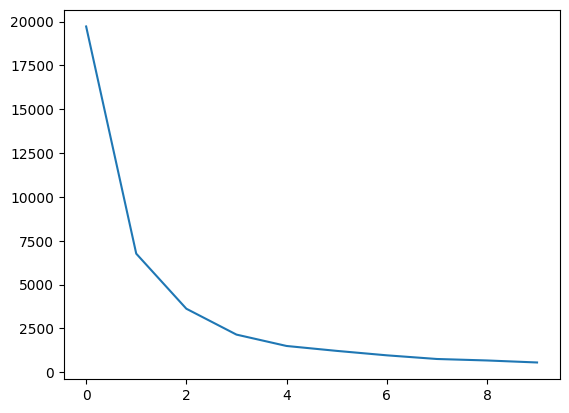

In [ ]:
plt.plot(wcss)

In [ ]:
kmeans=KMeans(n_clusters=2)

In [ ]:
clusters=kmeans.fit_predict(x)
clusters

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0], dtype=int32)

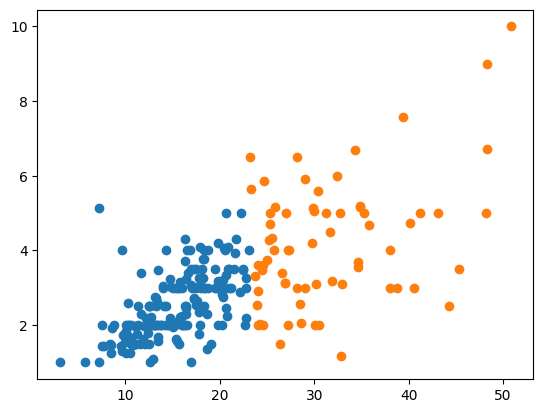

In [ ]:
plt.scatter(x[clusters==0]['total_bill'],x[clusters==0]['tip'])
plt.scatter(x[clusters==1]['total_bill'],x[clusters==1]['tip'])

In [ ]:
print(silhouette_score(x,kmeans.labels_))

0.609014028609117
